# Media company case study

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
media=pd.read_csv("C:/Users/mohan/Desktop/ML/Jupyter NB files/LMS/Hotstar casestudy/Hotstar_code_lyst5736_lyst1379/attachment_Hotstar_code_lyst5736/code_for_Teclov/mediacompany.csv",sep=",")

In [3]:
media.head(2)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN


In [4]:
media=media.drop(['Unnamed: 7'],axis=1)

In [10]:
# converting date to datetime format

media['Date']=pd.to_datetime(media['Date']).dt.date

In [11]:
media.head(2)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0


In [12]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
Date                   80 non-null object
Views_show             80 non-null int64
Visitors               80 non-null int64
Views_platform         80 non-null int64
Ad_impression          80 non-null int64
Cricket_match_india    80 non-null int64
Character_A            80 non-null int64
dtypes: int64(6), object(1)
memory usage: 4.5+ KB


In [13]:
media.isnull().sum()

Date                   0
Views_show             0
Visitors               0
Views_platform         0
Ad_impression          0
Cricket_match_india    0
Character_A            0
dtype: int64

In [14]:
#deriving days since the show started

from datetime import date

d0=date(2017,2,28)
d1=media.Date
delta=d1-d0
media['day']=delta

In [15]:
media.head(2)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days


In [17]:
media['day']=media['day'].astype(str)
media['day']=media['day'].apply(lambda x:x[0:2])
media['day']=media['day'].astype(int)

In [18]:
media.head(2)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2


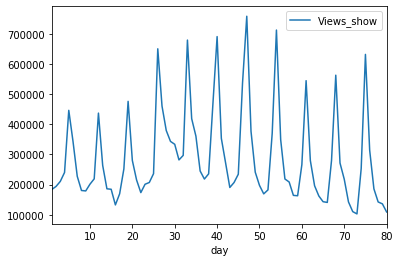

In [19]:
# days vs views show
media.plot.line(x='day',y='Views_show')

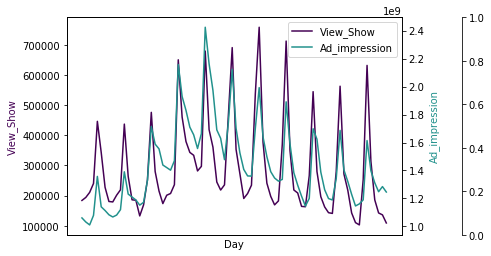

In [20]:
# plot for days vs Views_show and days vs Ad_impressions

fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel("Day")
host.set_ylabel("View_Show")
par1.set_ylabel("Ad_impression")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1, = host.plot(media.day,media.Views_show, color=color1,label="View_Show")
p2, = par1.plot(media.day,media.Ad_impression,color=color2, label="Ad_impression")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))      
# no x-ticks                 
par2.xaxis.set_ticks([])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

plt.savefig("pyplot_multiple_y-axis.png", bbox_inches='tight')

In [21]:
# derived metrics
# weekdays are taken such that 1 corresponds to Sunday and 7 corresponds to Saturday

media['weekday']=(media['day']+3)%7
media.weekday.replace(0,7,inplace=True)
media['weekday']=media['weekday'].astype(int)

In [22]:
media.head(2)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5


In [24]:
# Running first model  Weekdays and Visitors

X=media[['Visitors','weekday']] # Feature variables
Y=media['Views_show'] # Response variables

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr=LinearRegression()
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
import statsmodels.api as sm

X=sm.add_constant(X)
lr1=sm.OLS(Y,X).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           8.01e-12
Time:                        12:50:44   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.7

C:\Users\mohan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [30]:
# create weekend variable , with value 1 at weekends and 0 at weekdays

def cond(i):
    if i%7==5:
        return 1
    elif i%7==4:
        return 1
    else:
        return 0
    return i
media['weekend']=[cond(i) for i in media['day']]

In [33]:
media.head(6)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1
5,2017-03-06,342997,1330689,1742540,1140228426,0,0,6,2,0


In [34]:
# Running  second model

X=media[['Visitors','weekend']]
Y=media['Views_show']

In [35]:
X=sm.add_constant(X)
lr2=sm.OLS(Y,X).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           2.51e-12
Time:                        13:01:39   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

C:\Users\mohan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [36]:
# Running  third model

X=media[['Visitors','weekend','Character_A']]
Y=media['Views_show']

X=sm.add_constant(X)
lr3=sm.OLS(Y,X).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           1.53e-14
Time:                        13:03:03   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

In [37]:
# creating lag variable

media['lag_views']=np.roll(media['Views_show'],1)
media.lag_views.replace(108961,0,inplace=True)

In [38]:
media.head(6)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend,lag_views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,240061
5,2017-03-06,342997,1330689,1742540,1140228426,0,0,6,2,0,446314


In [39]:
# Running  fourth model

X=media[['Visitors','weekend','Character_A','lag_views']]
Y=media['Views_show']

X=sm.add_constant(X)
lr4=sm.OLS(Y,X).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           3.16e-21
Time:                        13:05:40   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      

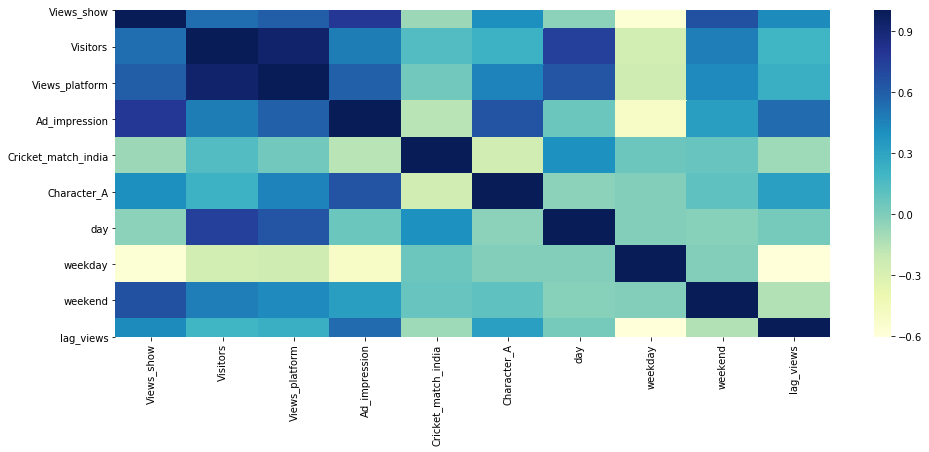

In [42]:
# Multi colinearity
plt.figure(figsize=(16,6))
sns.heatmap(media.corr(),cmap='YlGnBu')

In [43]:
# Running  fifth model

X=media[['Views_platform','weekend','Character_A']]
Y=media['Views_show']

X=sm.add_constant(X)
lr5=sm.OLS(Y,X).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           3.59e-15
Time:                        13:10:38   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.

C:\Users\mohan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [44]:
# Running  sixth model

X=media[['Visitors','weekend','Character_A']]
Y=media['Views_show']

X=sm.add_constant(X)
lr6=sm.OLS(Y,X).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           1.53e-14
Time:                        13:12:27   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

In [46]:
# Running  seventh model

X=media[['Visitors','weekend','Character_A','Ad_impression']]
Y=media['Views_show']

X=sm.add_constant(X)
lr7=sm.OLS(Y,X).fit()
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           1.10e-25
Time:                        13:13:53   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067

In [47]:
# Running  eight model

X=media[['weekend','Character_A','Ad_impression']]
Y=media['Views_show']

X=sm.add_constant(X)
lr8=sm.OLS(Y,X).fit()
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           1.05e-26
Time:                        13:14:54   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609

In [48]:
# Ad impression in million
media['Ad_impression']=media['Ad_impression']/1000000

In [50]:
# Running  ninth model

X=media[['weekend','Character_A','Ad_impression','Cricket_match_india']]
Y=media['Views_show']

X=sm.add_constant(X)
lr9=sm.OLS(Y,X).fit()
print(lr9.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           1.02e-25
Time:                        13:17:53   Log-Likelihood:                -1004.0
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.633e+05    

In [51]:
# Running  tenth model

X=media[['weekend','Ad_impression']]
Y=media['Views_show']

X=sm.add_constant(X)
lr10=sm.OLS(Y,X).fit()
print(lr10.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     151.7
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           1.95e-27
Time:                        13:18:06   Log-Likelihood:                -1005.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      77   BIC:                             2023.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.302e+05   4.01e+04     -5.744

In [52]:
ypred=lr10.predict(X)

from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(Y, ypred)
r2=r2_score(Y,ypred)

In [53]:
print("Mean Squared Error:", mse)
print("R2 score:", r2)

Mean Squared Error: 4797239258.824437
R2 score: 0.7975978797926214


Text(0.5, 1.0, 'Actual and Predicted')

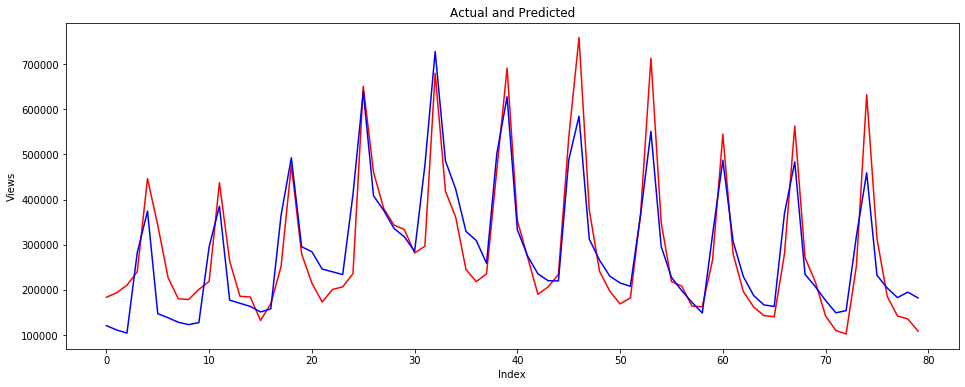

In [58]:
plt.figure(figsize=(16,6))
plt.plot(range(len(Y)),Y,color="red")
plt.plot(range(len(ypred)),ypred,color="blue")
plt.xlabel("Index")
plt.ylabel("Views")
plt.title("Actual and Predicted")

Text(0.5, 1.0, 'Error terms')

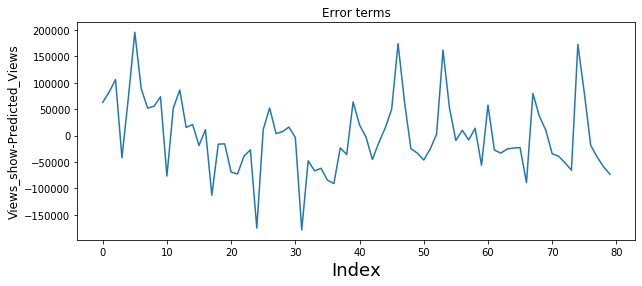

In [64]:
# Looking at the error terms

plt.figure(figsize=(10,4))
plt.plot(range(len(Y)),Y-ypred)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Views_show-Predicted_Views',fontsize=12)
plt.title("Error terms")